In [ ]:
# Importation des packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api

# Lecture du DataFrame
df = pd.read_csv(r'Pyrefighter_cleaned_database.csv', sep = ';')
df.head()

,IncidentNumber,ResponseTimeMinute,PropertyCategory,AddressQualifier,IncGeo_BoroughName,IncidentStationGround,FirstPumpArriving_DeployedFromStation,DeployedFromStation_Name,DeployedFromLocation,HourMobilised,WeekdayMobilised,MonthMobilised,CityCenter,CalYear
0,000004-01012017,14.0,Non Residential,Nearby address - street not listed in gazetteer,GREENWICH,Plumstead,Plumstead,Plumstead,Home Station,0,6,1,False,2017
1,000005-01012017,4.0,Dwelling,Correct incident location,ISLINGTON,Euston,Euston,Euston,Home Station,0,6,1,True,2017
2,000006-01012017,5.0,Non Residential,Correct incident location,BARKING AND DAGENHAM,Barking,Barking,Barking,Home Station,0,6,1,False,2017
3,000008-01012017,7.0,Outdoor,On land associated with building,EALING,Northolt,Northolt,Northolt,Home Station,0,6,1,False,2017
4,000009-01012017,4.0,Non Residential,Correct incident location,ISLINGTON,Shoreditch,Shoreditch,Shoreditch,Home Station,0,6,1,True,2017


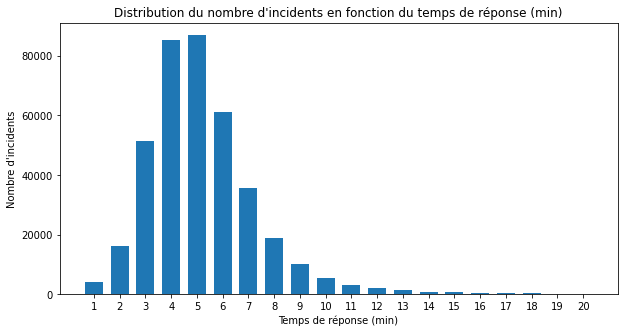

In [ ]:
# Distribution du nombre d'incidents en fonction du temps de réponse (min)
plt.figure(figsize=(10,5))
plt.hist(df['ResponseTimeMinute'], rwidth = 0.7, range = (1,21), align = 'left', bins = 20)
plt.xticks(range(1,21))
plt.xlabel('Temps de réponse (min)')
plt.ylabel('Nombre d\'incidents')
plt.title('Distribution du nombre d\'incidents en fonction du temps de réponse (min)');

,df,sum_sq,mean_sq,F,PR(>F)
HourMobilised,1.0,2.207728e+03,2207.728374,458.811106,1.000336e-101
Residual,385301.0,1.854009e+06,4.811846,NaN,NaN


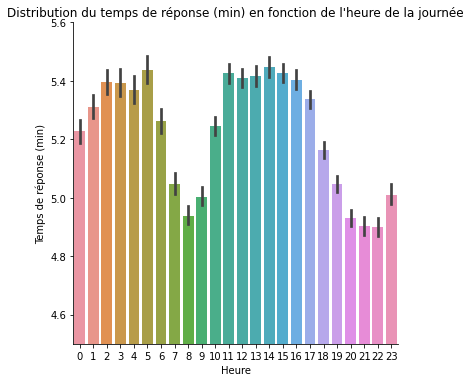

In [ ]:
# Distribution du temps de réponse (min) en fonction de l'heure de la journée
sns.catplot(x = 'HourMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6.4)
plt.xlabel('Heure')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de l\'heure de la journée');

# Etude de la corrélation entre le temps de réponse et l’heure de la journée par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ HourMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

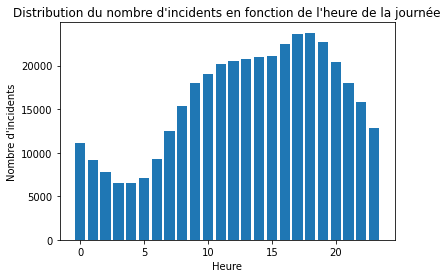

In [ ]:
# Distribution du nombre d'incidents en fonction de l'heure
incident_per_hour = df.groupby('HourMobilised', as_index = False).agg({'IncidentNumber':'count'})
plt.bar(incident_per_hour['HourMobilised'],incident_per_hour['IncidentNumber'])
plt.xlabel('Heure')
plt.ylabel('Nombre d\'incidents')
plt.title('Distribution du nombre d\'incidents en fonction de l\'heure de la journée');

,df,sum_sq,mean_sq,F,PR(>F)
WeekdayMobilised,1.0,1.062731e+01,10.627313,2.205959,0.137479
Residual,385301.0,1.856206e+06,4.817548,NaN,NaN


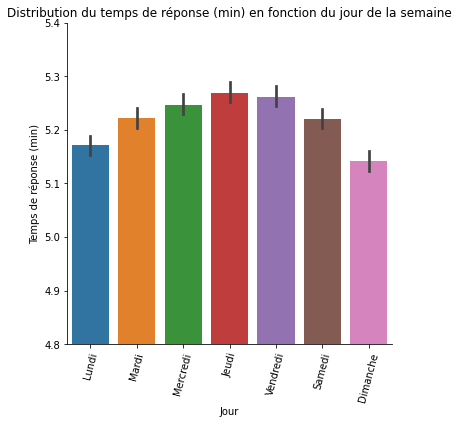

In [ ]:
# Distribution du temps de réponse (min) en fonction du jour de la semaine
viz = sns.catplot(x = 'WeekdayMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6)
plt.xticks([0,1,2,3,4,5,6], ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
viz.set_xticklabels(rotation=75)
plt.xlabel('Jour')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du jour de la semaine');

# Etude de la corrélation entre le temps de réponse et le jour de la semaine par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ WeekdayMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
MonthMobilised,1.0,5.036561e+01,50.365612,10.454839,0.001223
Residual,385301.0,1.856166e+06,4.817445,NaN,NaN


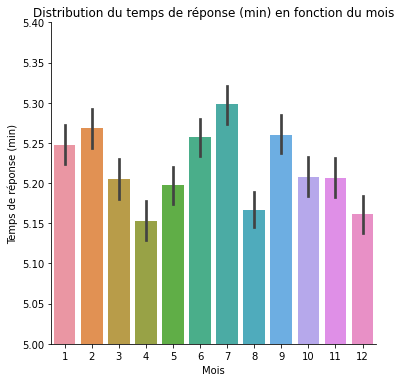

In [ ]:
# Distribution du temps de réponse (min) en fonction du mois
sns.catplot(x = 'MonthMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6)
plt.xlabel('Mois')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du mois');

# Etude de la corrélation entre le temps de réponse et le mois par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ MonthMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

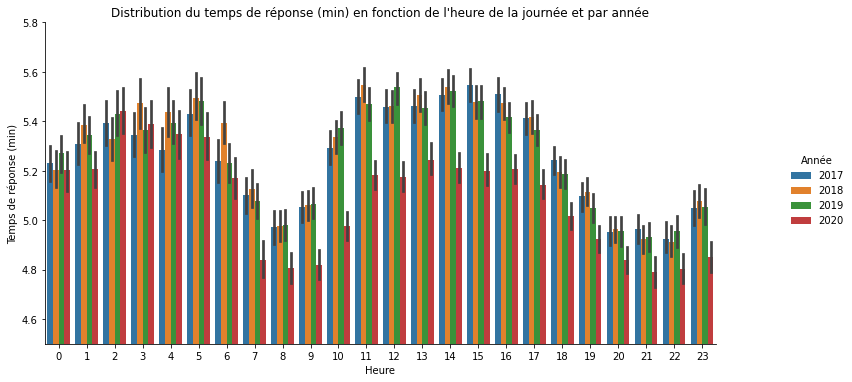

In [ ]:
# Distribution du temps de réponse (min) en fonction de l'heure de la journée et par année
df['Année'] = df['CalYear']
viz = sns.catplot(x = 'HourMobilised', y = 'ResponseTimeMinute', kind = 'bar', hue = 'Année', data = df)
plt.ylim(5,6.5)
viz.fig.set_size_inches(12,5)
plt.xlabel('Heure')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de l\'heure de la journée et par année');

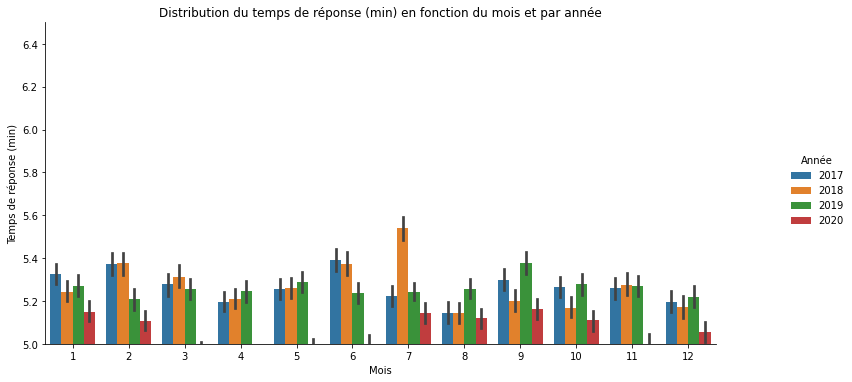

In [ ]:
# Distribution du temps de réponse (min) en fonction du mois et par année
viz = sns.catplot(x = 'MonthMobilised', y = 'ResponseTimeMinute', kind = 'bar', hue = 'Année', data = df)
plt.ylim(5,6.5)
viz.fig.set_size_inches(12,5)
plt.xlabel('Mois')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du mois et par année');

,df,sum_sq,mean_sq,F,PR(>F)
PropertyCategory,8.0,3.618099e+04,4522.623429,957.420543,0.0
Residual,385294.0,1.820036e+06,4.723759,NaN,NaN


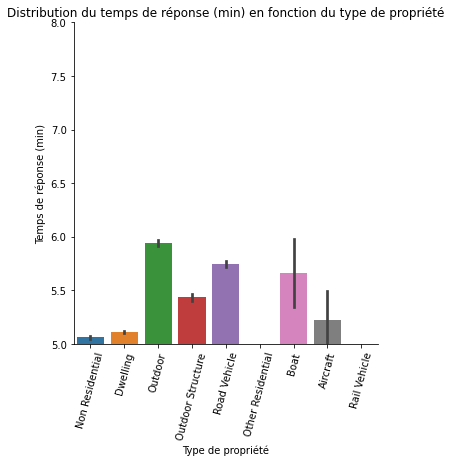

In [ ]:
# Distribution du temps de réponse (min) en fonction du type de propriété
viz = sns.catplot(x = 'PropertyCategory', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=75)
plt.ylim(5,8)
plt.xlabel('Type de propriété')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du type de propriété');

# Etude de la corrélation entre le temps de réponse et le type de propriété par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ PropertyCategory', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
AddressQualifier,10.0,4.850478e+04,4850.477838,1033.820813,0.0
Residual,385292.0,1.807712e+06,4.691797,NaN,NaN


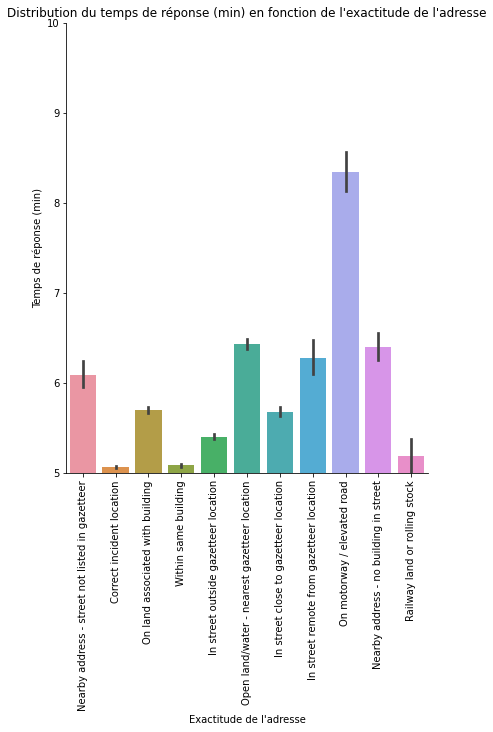

In [ ]:
# Distribution du temps de réponse (min) en fonction de l'exactitude de l'adresse
viz = sns.catplot(x = 'AddressQualifier', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.ylim(5,10)
viz.fig.set_size_inches(10,7)
plt.xlabel('Exactitude de l\'adresse')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de l\'exactitude de l\'adresse');

# Etude de la corrélation entre le temps de réponse et l'exactitude de l'adresse par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ AddressQualifier', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
IncGeo_BoroughName,32.0,7.886677e+04,2464.586651,534.2399,0.0
Residual,385270.0,1.777350e+06,4.613258,NaN,NaN


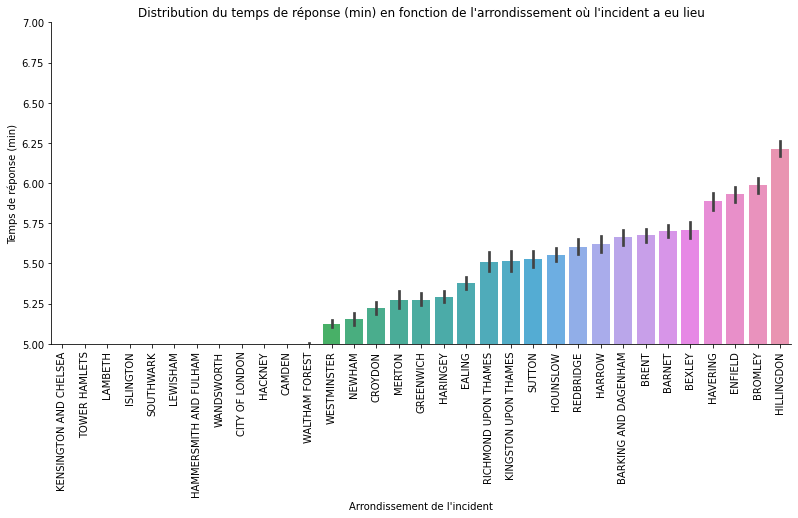

In [ ]:
# Distribution du temps de réponse (min) en fonction de l'arrondissement où l'incident a eu lieu
df_sorted = df.groupby(["IncGeo_BoroughName"])['ResponseTimeMinute'].aggregate(np.mean).reset_index().sort_values('ResponseTimeMinute')
viz = sns.catplot(x = 'IncGeo_BoroughName', y = 'ResponseTimeMinute', kind = 'bar', order = df_sorted["IncGeo_BoroughName"], data = df)
viz.fig.set_size_inches(15,5)
viz.set_xticklabels(rotation=90)
plt.ylim(5,7)
plt.xlabel('Arrondissement de l\'incident')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de l\'arrondissement où l\'incident a eu lieu');

# Etude de la corrélation entre le temps de réponse et l'arrondissement où l'incident a lieu par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ IncGeo_BoroughName', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
CityCenter,1.0,5.082266e+04,50822.655253,10846.396057,0.0
Residual,385301.0,1.805394e+06,4.685672,NaN,NaN


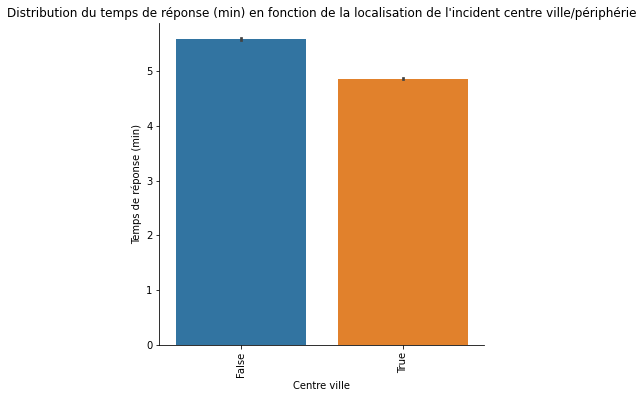

In [ ]:
# Distribution du temps de réponse (min) en fonction de la localisation de l'incident centre ville/périphérie
viz = sns.catplot(x = 'CityCenter', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.xlabel('Centre ville')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de la localisation de l\'incident centre ville/périphérie');

# Etude de la corrélation entre le temps de réponse et la localisation de l'incident centre ville/périphérie par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ CityCenter', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
IncidentStationGround,101.0,1.050774e+05,1040.369943,228.851875,0.0
Residual,385201.0,1.751139e+06,4.546041,NaN,NaN


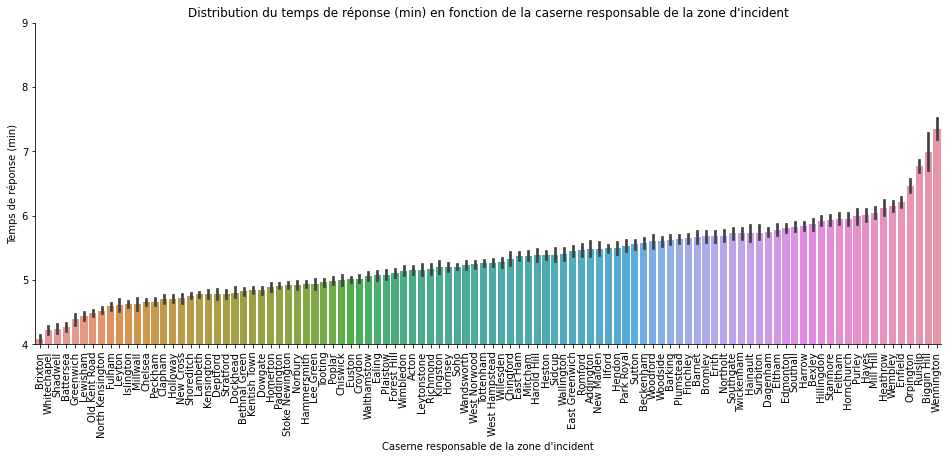

In [ ]:
# Distribution du temps de réponse (min) en fonction de la caserne responsable de la zone d'incident
df_sorted = df.groupby(["IncidentStationGround"])['ResponseTimeMinute'].aggregate(np.mean).reset_index().sort_values('ResponseTimeMinute')
viz = sns.catplot(x = 'IncidentStationGround', y = 'ResponseTimeMinute', kind = 'bar', order = df_sorted["IncidentStationGround"], data = df)
viz.fig.set_size_inches(16,5)
viz.set_xticklabels(rotation=90)
plt.ylim(4,9)
plt.xlabel('Caserne responsable de la zone d\'incident')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de la caserne responsable de la zone d\'incident');

# Etude de la corrélation entre le temps de réponse et la caserne responsable de la zone d'incident par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ IncidentStationGround', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
FirstPumpArriving_DeployedFromStation,104.0,8.732715e+04,839.684177,182.851806,0.0
Residual,385198.0,1.768890e+06,4.592157,NaN,NaN


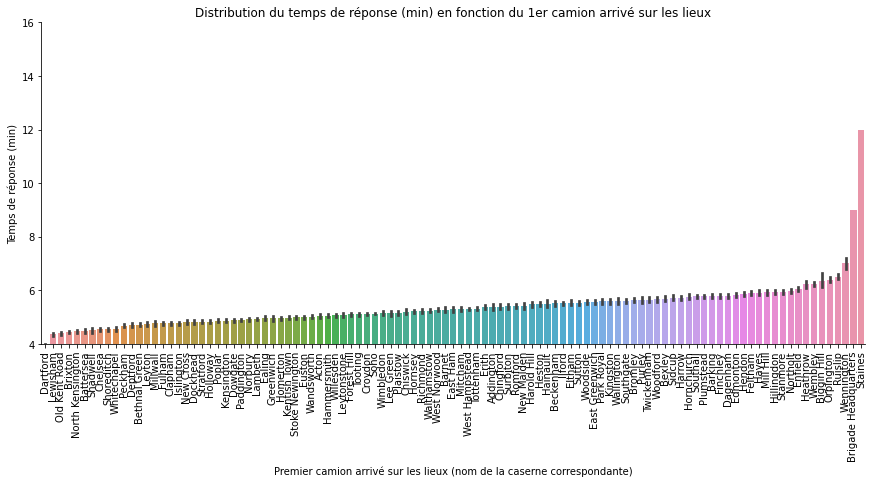

In [ ]:
# Distribution du temps de réponse (min) en fonction du 1er camion arrivé sur les lieux
df_sorted = df.groupby(["FirstPumpArriving_DeployedFromStation"])['ResponseTimeMinute'].aggregate(np.mean).reset_index().sort_values('ResponseTimeMinute')
viz = sns.catplot(x = 'FirstPumpArriving_DeployedFromStation', y = 'ResponseTimeMinute', kind = 'bar', order = df_sorted["FirstPumpArriving_DeployedFromStation"], data = df)
viz.fig.set_size_inches(16,5)
viz.set_xticklabels(rotation=90)
plt.ylim(4,16)
plt.xlabel('Premier camion arrivé sur les lieux (nom de la caserne correspondante)')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du 1er camion arrivé sur les lieux');

# Etude de la corrélation entre le temps de réponse et le 1er camion arrivé sur les lieux par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ FirstPumpArriving_DeployedFromStation', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
DeployedFromStation_Name,104.0,8.732110e+04,839.625952,182.838501,0.0
Residual,385198.0,1.768896e+06,4.592173,NaN,NaN


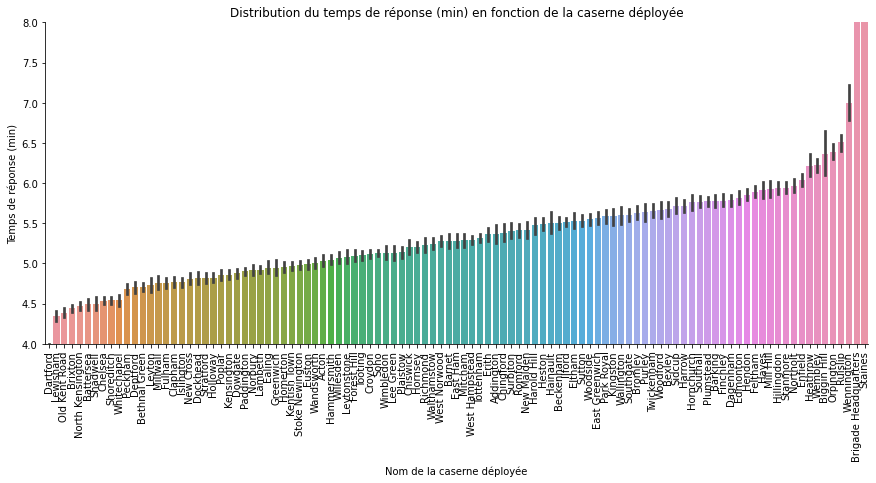

In [ ]:
# Distribution du temps de réponse (min) en fonction de la caserne déployée
df_sorted = df.groupby(["DeployedFromStation_Name"])['ResponseTimeMinute'].aggregate(np.mean).reset_index().sort_values('ResponseTimeMinute')
viz = sns.catplot(x = 'DeployedFromStation_Name', y = 'ResponseTimeMinute', kind = 'bar', order = df_sorted["DeployedFromStation_Name"], data = df)
viz.fig.set_size_inches(16,5)
viz.set_xticklabels(rotation=90)
plt.ylim(4,8)
plt.xlabel('Nom de la caserne déployée')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction de la caserne déployée');

# Etude de la corrélation entre le temps de réponse et la caserne déployée par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ DeployedFromStation_Name', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
DeployedFromLocation,1.0,3.470397e+03,3470.396999,721.710988,7.972721e-159
Residual,385301.0,1.852746e+06,4.808569,NaN,NaN


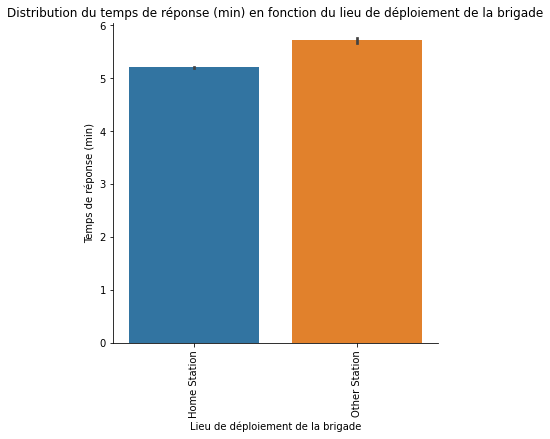

In [ ]:
# Distribution du temps de réponse (min) en fonction du lieu de déploiement de la brigade
viz = sns.catplot(x = 'DeployedFromLocation', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.xlabel('Lieu de déploiement de la brigade')
plt.ylabel('Temps de réponse (min)')
plt.title('Distribution du temps de réponse (min) en fonction du lieu de déploiement de la brigade');

# Etude de la corrélation entre le temps de réponse et le lieu de déploiement de la brigade par le test ANOVA
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ DeployedFromLocation', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table